In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
data=pd.read_csv("./dataset/Hotel_Reviews.csv")
data.head(),data.shape

(                                       Hotel_Address  \
 0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...   
 
    Additional_Number_of_Scoring Review_Date  Average_Score   Hotel_Name  \
 0                           194    8/3/2017            7.7  Hotel Arena   
 1                           194    8/3/2017            7.7  Hotel Arena   
 2                           194   7/31/2017            7.7  Hotel Arena   
 3                           194   7/31/2017            7.7  Hotel Arena   
 4                           194   7/24/2017            7.7  Hotel Arena   
 
   Reviewer_Nationality                                    Negative_Review  \
 0              Russia    I am so angry that i made this post available...   
 1             Ireland                    

In [4]:
data.shape,data.loc[0]

((515738, 17),
 Hotel_Address                                  s Gravesandestraat 55 Oost 1092 AA Amsterdam ...
 Additional_Number_of_Scoring                                                                194
 Review_Date                                                                            8/3/2017
 Average_Score                                                                               7.7
 Hotel_Name                                                                          Hotel Arena
 Reviewer_Nationality                                                                    Russia 
 Negative_Review                                I am so angry that i made this post available...
 Review_Total_Negative_Word_Counts                                                           397
 Total_Number_of_Reviews                                                                    1403
 Positive_Review                                Only the park outside of the hotel was beauti...
 Review_Total_P

In [5]:
data.Hotel_Address.unique()

array([' s Gravesandestraat 55 Oost 1092 AA Amsterdam Netherlands',
       '1 15 Templeton Place Earl s Court Kensington and Chelsea London SW5 9NB United Kingdom',
       '1 2 Serjeant s Inn Fleet Street City of London London EC4Y 1LL United Kingdom',
       ...,
       'Wilton Place Knightsbridge Westminster Borough London SW1X 7RL United Kingdom',
       'Wrights Lane Kensington and Chelsea London W8 5SP United Kingdom',
       'Wurzbachgasse 21 15 Rudolfsheim F nfhaus 1150 Vienna Austria'],
      shape=(1493,), dtype=object)

In [6]:
data.Hotel_Name.unique()

array(['Hotel Arena', 'K K Hotel George', 'Apex Temple Court Hotel', ...,
       'The Berkeley', 'Holiday Inn London Kensington',
       'Atlantis Hotel Vienna'], shape=(1492,), dtype=object)

In [7]:
for key,value in data.groupby(["Hotel_Name"])["Tags"]:
    print(f"{key} : {value}")

('11 Cadogan Gardens',) : 33703    [' Leisure trip ', ' Couple ', ' Superior Quee...
33704    [' Leisure trip ', ' Couple ', ' Superior Quee...
33705    [' Leisure trip ', ' Solo traveler ', ' Single...
33706    [' Leisure trip ', ' Couple ', ' Superior Quee...
33707    [' Leisure trip ', ' Couple ', ' Superior Quee...
                               ...                        
33857    [' Leisure trip ', ' Couple ', ' Superior Quee...
33858    [' Leisure trip ', ' Group ', ' Deluxe King Ro...
33859    [' Business trip ', ' Solo traveler ', ' 2 roo...
33860    [' Leisure trip ', ' Couple ', ' Superior Quee...
33861    [' Leisure trip ', ' Couple ', ' Superior Quee...
Name: Tags, Length: 159, dtype: object
('1K Hotel',) : 43148    [' Leisure trip ', ' Couple ', ' Superior M Do...
43149    [' Leisure trip ', ' Solo traveler ', ' Superi...
43150    [' Leisure trip ', ' Couple ', ' Superior M Do...
43151    [' Leisure trip ', ' Group ', ' Superior M Dou...
43152    [' Leisure trip ', ' Solo

In [8]:
for key,value in data.groupby(["Hotel_Name"])["Reviewer_Score"]:
    print(f"{key} : {value.mean()}")

('11 Cadogan Gardens',) : 8.845283018867924
('1K Hotel',) : 7.861486486486487
('25hours Hotel beim MuseumsQuartier',) : 8.983309143686503
('41',) : 9.711650485436893
('45 Park Lane Dorchester Collection',) : 9.60357142857143
('88 Studios',) : 8.489106753812635
('9Hotel Republique',) : 8.743715846994535
('A La Villa Madame',) : 8.853658536585366
('ABaC Restaurant Hotel Barcelona GL Monumento',) : 8.464516129032257
('AC Hotel Barcelona Forum a Marriott Lifestyle Hotel',) : 8.001384083044982
('AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel',) : 8.398214285714285
('AC Hotel Irla a Marriott Lifestyle Hotel',) : 8.125
('AC Hotel Milano a Marriott Lifestyle Hotel',) : 8.202777777777776
('AC Hotel Paris Porte Maillot by Marriott',) : 8.425333333333334
('AC Hotel Sants a Marriott Lifestyle Hotel',) : 7.921978021978023
('AC Hotel Victoria Suites a Marriott Lifestyle Hotel',) : 8.828888888888889
('ADI Doria Grand Hotel',) : 8.38843537414966
('ADI Hotel Poliziano Fiera',) : 8.042990654205608


In [9]:
data.Hotel_Address=data.Hotel_Address.str.replace("United Kingdom","UK")

In [10]:
data["country"]=data.Hotel_Address.apply(lambda x:x.split(" ")[-1])
data.country

0         Netherlands
1         Netherlands
2         Netherlands
3         Netherlands
4         Netherlands
             ...     
515733        Austria
515734        Austria
515735        Austria
515736        Austria
515737        Austria
Name: country, Length: 515738, dtype: object

In [11]:
data.country.value_counts()

country
UK             262301
Spain           60149
France          59928
Netherlands     57214
Austria         38939
Italy           37207
Name: count, dtype: int64

<Axes: xlabel='country', ylabel='count'>

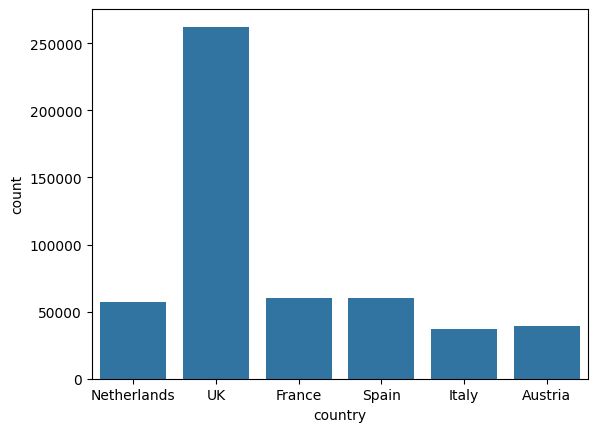

In [12]:
sns.countplot(x=data.country)

<Axes: xlabel='country', ylabel='count'>

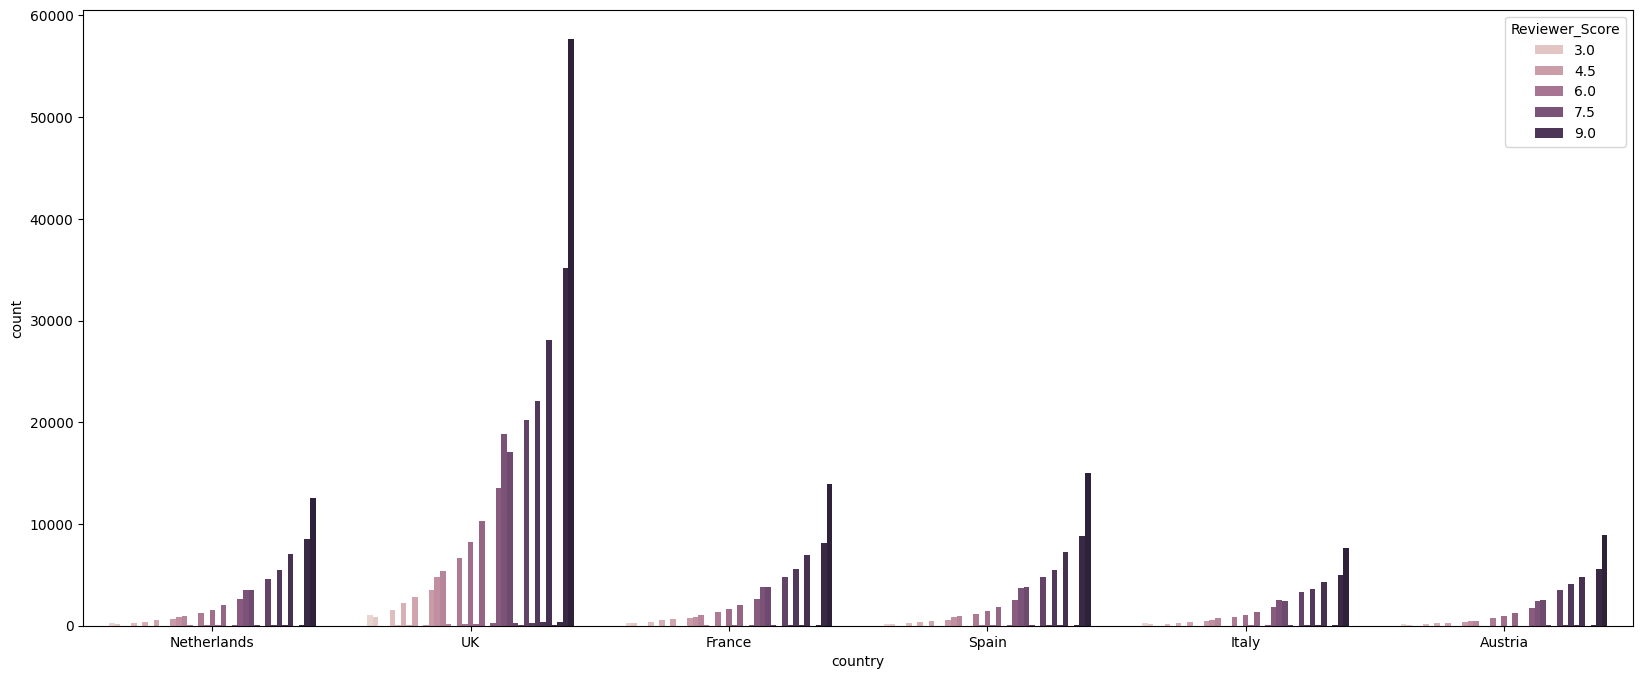

In [13]:
plt.figure(figsize=(20,8))
sns.countplot(x=data.country,hue=data.Reviewer_Score)

### Report 
- This data has maximum review of UK.

In [14]:
data.isna().sum()

Hotel_Address                                    0
Additional_Number_of_Scoring                     0
Review_Date                                      0
Average_Score                                    0
Hotel_Name                                       0
Reviewer_Nationality                             0
Negative_Review                                  0
Review_Total_Negative_Word_Counts                0
Total_Number_of_Reviews                          0
Positive_Review                                  0
Review_Total_Positive_Word_Counts                0
Total_Number_of_Reviews_Reviewer_Has_Given       0
Reviewer_Score                                   0
Tags                                             0
days_since_review                                0
lat                                           3268
lng                                           3268
country                                          0
dtype: int64

In [15]:
data.Tags

0         [' Leisure trip ', ' Couple ', ' Duplex Double...
1         [' Leisure trip ', ' Couple ', ' Duplex Double...
2         [' Leisure trip ', ' Family with young childre...
3         [' Leisure trip ', ' Solo traveler ', ' Duplex...
4         [' Leisure trip ', ' Couple ', ' Suite ', ' St...
                                ...                        
515733    [' Leisure trip ', ' Family with older childre...
515734    [' Leisure trip ', ' Family with young childre...
515735    [' Leisure trip ', ' Family with older childre...
515736    [' Leisure trip ', ' Group ', ' Standard Tripl...
515737    [' Leisure trip ', ' Family with young childre...
Name: Tags, Length: 515738, dtype: object

In [16]:
for key,value in data.groupby("Hotel_Name")["Additional_Number_of_Scoring"]:
    print(key,value.agg(["min","mean"]))

11 Cadogan Gardens min     101.0
mean    101.0
Name: Additional_Number_of_Scoring, dtype: float64
1K Hotel min     69.0
mean    69.0
Name: Additional_Number_of_Scoring, dtype: float64
25hours Hotel beim MuseumsQuartier min     391.0
mean    391.0
Name: Additional_Number_of_Scoring, dtype: float64
41 min     66.0
mean    66.0
Name: Additional_Number_of_Scoring, dtype: float64
45 Park Lane Dorchester Collection min     27.0
mean    27.0
Name: Additional_Number_of_Scoring, dtype: float64
88 Studios min     197.0
mean    197.0
Name: Additional_Number_of_Scoring, dtype: float64
9Hotel Republique min     100.0
mean    100.0
Name: Additional_Number_of_Scoring, dtype: float64
A La Villa Madame min     24.0
mean    24.0
Name: Additional_Number_of_Scoring, dtype: float64
ABaC Restaurant Hotel Barcelona GL Monumento min     10.0
mean    10.0
Name: Additional_Number_of_Scoring, dtype: float64
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel min     160.0
mean    160.0
Name: Additional_Number_of

In [17]:
data.Review_Date=pd.to_datetime(data.Review_Date)
data["review_year"]=data.Review_Date.dt.year
data.review_year.value_counts()

review_year
2016    264403
2017    156808
2015     94527
Name: count, dtype: int64

Text(0.5, 0, 'Year of review')

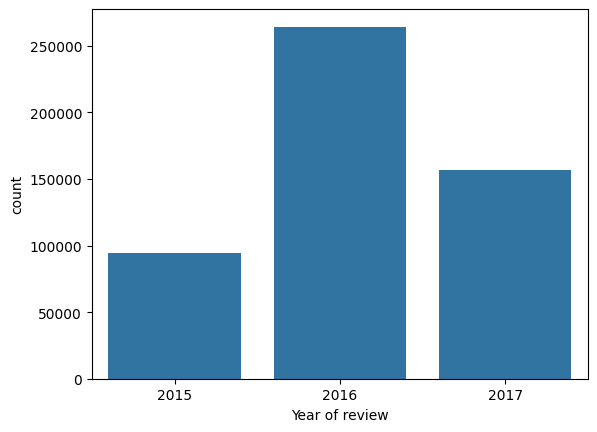

In [18]:
sns.countplot(x=data.review_year)
plt.xlabel("Year of review")

### Report:
- Data consists of maximum reviews of 2016 year.

In [19]:
data.Review_Date.dt.month.value_counts().sort_values(ascending=False)

Review_Date
8     50672
7     49318
5     46490
10    43843
6     42896
4     42883
9     42428
1     42151
3     41110
12    39607
2     38370
11    35970
Name: count, dtype: int64

<Axes: xlabel='Review_Date', ylabel='count'>

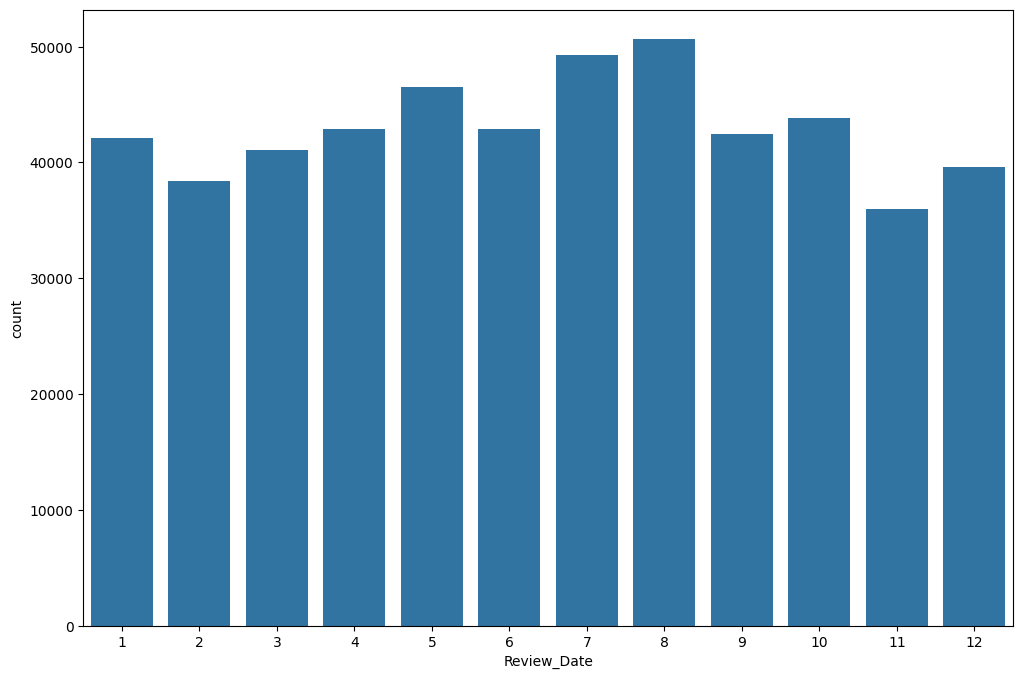

In [20]:
plt.figure(figsize=(12,8))
sns.barplot(x=data.Review_Date.dt.month.value_counts().sort_values(ascending=False).index,y=data.Review_Date.dt.month.value_counts().sort_values(ascending=False))

### Report
- Most number of reviews are given in **july-August** month.
- **Novmber** month has the least number of reviews depecting less number of ttravells made in hotels in this month.

In [21]:
data.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
lat                                                  float64
lng                     

In [22]:
for keys,values in data.groupby("Hotel_Name")["Average_Score"]:
    print(keys,values.agg(["mean","max","min"]))

11 Cadogan Gardens mean    8.7
max     8.7
min     8.7
Name: Average_Score, dtype: float64
1K Hotel mean    7.7
max     7.7
min     7.7
Name: Average_Score, dtype: float64
25hours Hotel beim MuseumsQuartier mean    8.8
max     8.8
min     8.8
Name: Average_Score, dtype: float64
41 mean    9.6
max     9.6
min     9.6
Name: Average_Score, dtype: float64
45 Park Lane Dorchester Collection mean    9.4
max     9.4
min     9.4
Name: Average_Score, dtype: float64
88 Studios mean    8.4
max     8.4
min     8.4
Name: Average_Score, dtype: float64
9Hotel Republique mean    8.8
max     8.8
min     8.8
Name: Average_Score, dtype: float64
A La Villa Madame mean    8.8
max     8.8
min     8.8
Name: Average_Score, dtype: float64
ABaC Restaurant Hotel Barcelona GL Monumento mean    8.8
max     8.8
min     8.8
Name: Average_Score, dtype: float64
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel mean    8.1
max     8.1
min     8.1
Name: Average_Score, dtype: float64
AC Hotel Diagonal L Illa a Marriott

In [23]:
for keys,values in data.groupby("Hotel_Name")[["Average_Score","Reviewer_Score"]]:
    print(keys,values.mean())

11 Cadogan Gardens Average_Score     8.700000
Reviewer_Score    8.845283
dtype: float64
1K Hotel Average_Score     7.700000
Reviewer_Score    7.861486
dtype: float64
25hours Hotel beim MuseumsQuartier Average_Score     8.800000
Reviewer_Score    8.983309
dtype: float64
41 Average_Score     9.60000
Reviewer_Score    9.71165
dtype: float64
45 Park Lane Dorchester Collection Average_Score     9.400000
Reviewer_Score    9.603571
dtype: float64
88 Studios Average_Score     8.400000
Reviewer_Score    8.489107
dtype: float64
9Hotel Republique Average_Score     8.800000
Reviewer_Score    8.743716
dtype: float64
A La Villa Madame Average_Score     8.800000
Reviewer_Score    8.853659
dtype: float64
ABaC Restaurant Hotel Barcelona GL Monumento Average_Score     8.800000
Reviewer_Score    8.464516
dtype: float64
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel Average_Score     8.100000
Reviewer_Score    8.001384
dtype: float64
AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel Average_Score  

In [24]:
data.groupby(["country","Hotel_Name"])[["Average_Score","Reviewer_Score"]].mean().sort_values(by=["Reviewer_Score","Average_Score"],ascending=False).head(20)

Average_Score  \
country Hotel_Name                                                    
France  Ritz Paris                                              9.8   
Spain   Hotel Casa Camper                                       9.6   
UK      41                                                      9.6   
France  H tel de La Tamise Esprit de France                     9.6   
        Le Narcisse Blanc Spa                                   9.5   
Spain   H10 Casa Mimosa 4 Sup                                   9.6   
France  Hotel Eiffel Blomet                                     9.4   
Spain   Hotel The Serras                                        9.6   
UK      45 Park Lane Dorchester Collection                      9.4   
        The Soho Hotel                                          9.5   
        Haymarket Hotel                                         9.6   
Austria Hotel Sacher Wien                                       9.5   
UK      Covent Garden Hotel                                     9.4   
        Milestone Hotel Kensington                              9.5   
France  Hotel Plaza Athenee Paris                               9.3   
Spain   Catalonia Magdalenes                                    9.4   
France  H tel Fabric                                            9.3   
UK      Taj 51 Buckingham Gate Suites and Residences            9.5   
Austria Hollmann Beletage Design Boutique                       9.3   
France  H tel D Aubusson                                        9.4   

                                                      Reviewer_Score  
country Hotel_Name                                                    
France  Ritz Paris                                          9.725000  
Spain   Hotel Casa Camper                                   9.718937  
UK      41                                                  9.711650  
France  H tel de La Tamise Esprit de France                 9.688525  
        Le Narcisse Blanc Spa                               9.671930  
Spain   H10 Casa Mimosa 4 Sup                               9.660345  
France  Hotel Eiffel Blomet                                 9.646667  
Spain   Hotel The Serras                                    9.623474  
UK      45 Park Lane Dorchester Collection                  9.603571  
        The Soho Hotel                                      9.597452  
        Haymarket Hotel                                     9.590909  
Austria Hotel Sacher Wien                                   9.589231  
UK      Covent Garden Hotel                                 9.587838  
        Milestone Hotel Kensington                          9.572093  
France  Hotel Plaza Athenee Paris                           9.566667  
Spain   Catalonia Magdalenes                                9.561415  
France  H tel Fabric                                        9.559223  
UK      Taj 51 Buckingham Gate Suites and Residences        9.554887  
Austria Hollmann Beletage Design Boutique                   9.553922  
France  H tel D Aubusson                                    9.552041

In [25]:
data.groupby(["country","Hotel_Name"])["Average_Score"].mean().sort_values(ascending=False).head(20)

country      Hotel_Name                                  
France       Ritz Paris                                      9.8
UK           41                                              9.6
             Haymarket Hotel                                 9.6
Spain        Hotel Casa Camper                               9.6
France       H tel de La Tamise Esprit de France             9.6
Spain        Hotel The Serras                                9.6
             H10 Casa Mimosa 4 Sup                           9.6
UK           Charlotte Street Hotel                          9.5
France       Hotel The Peninsula Paris                       9.5
Spain        Mercer Hotel Barcelona                          9.5
Netherlands  Waldorf Astoria Amsterdam                       9.5
UK           Taj 51 Buckingham Gate Suites and Residences    9.5
France       Le Narcisse Blanc Spa                           9.5
UK           Ham Yard Hotel                                  9.5
Austria      Hotel Sacher Wien  

In [26]:
for k,v in data.groupby("Hotel_Name")[["Average_Score","Reviewer_Score"]]:
    print(k,v.mean())

11 Cadogan Gardens Average_Score     8.700000
Reviewer_Score    8.845283
dtype: float64
1K Hotel Average_Score     7.700000
Reviewer_Score    7.861486
dtype: float64
25hours Hotel beim MuseumsQuartier Average_Score     8.800000
Reviewer_Score    8.983309
dtype: float64
41 Average_Score     9.60000
Reviewer_Score    9.71165
dtype: float64
45 Park Lane Dorchester Collection Average_Score     9.400000
Reviewer_Score    9.603571
dtype: float64
88 Studios Average_Score     8.400000
Reviewer_Score    8.489107
dtype: float64
9Hotel Republique Average_Score     8.800000
Reviewer_Score    8.743716
dtype: float64
A La Villa Madame Average_Score     8.800000
Reviewer_Score    8.853659
dtype: float64
ABaC Restaurant Hotel Barcelona GL Monumento Average_Score     8.800000
Reviewer_Score    8.464516
dtype: float64
AC Hotel Barcelona Forum a Marriott Lifestyle Hotel Average_Score     8.100000
Reviewer_Score    8.001384
dtype: float64
AC Hotel Diagonal L Illa a Marriott Lifestyle Hotel Average_Score  

In [27]:
#Here i have combined the reviewer score and average score into final rating by taking their average values.
data["final_rating"]=(data.Reviewer_Score+data.Average_Score)/2
data.final_rating

0         5.30
1         7.60
2         7.40
3         5.75
4         7.20
          ... 
515733    7.55
515734    6.95
515735    5.30
515736    8.45
515737    8.20
Name: final_rating, Length: 515738, dtype: float64

In [28]:
data.groupby(["country","Hotel_Name"])["final_rating"].mean().sort_values(ascending=False)

country      Hotel_Name                              
France       Ritz Paris                                  9.762500
Spain        Hotel Casa Camper                           9.659468
UK           41                                          9.655825
France       H tel de La Tamise Esprit de France         9.644262
Spain        H10 Casa Mimosa 4 Sup                       9.630172
                                                           ...   
UK           Best Western Maitrise Hotel Edgware Road    6.487500
             Hotel Cavendish                             6.421033
France       Villa Eugenie                               6.332258
Netherlands  Savoy Hotel Amsterdam                       6.204733
Italy        Hotel Liberty                               5.160769
Name: final_rating, Length: 1494, dtype: float64

In [29]:
data.dtypes

Hotel_Address                                         object
Additional_Number_of_Scoring                           int64
Review_Date                                   datetime64[ns]
Average_Score                                        float64
Hotel_Name                                            object
Reviewer_Nationality                                  object
Negative_Review                                       object
Review_Total_Negative_Word_Counts                      int64
Total_Number_of_Reviews                                int64
Positive_Review                                       object
Review_Total_Positive_Word_Counts                      int64
Total_Number_of_Reviews_Reviewer_Has_Given             int64
Reviewer_Score                                       float64
Tags                                                  object
days_since_review                                     object
lat                                                  float64
lng                     

In [30]:
data1=data.drop(["Additional_Number_of_Scoring","Review_Date","Average_Score","Reviewer_Nationality","Total_Number_of_Reviews","Review_Total_Positive_Word_Counts","Review_Total_Negative_Word_Counts","Total_Number_of_Reviews_Reviewer_Has_Given","Reviewer_Score","days_since_review","lat","lng","review_year"],axis=1)
data1.shape

(515738, 7)

In [31]:
data1.head()

Hotel_Address   Hotel_Name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

                                                Tags      country  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
2  [' Leisure trip ', ' Family with young childre...  Netherlands   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...  Netherlands   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...  Netherlands   

   final_rating  
0          5.30  
1          7.60  
2          7.40  
3          5.75  
4          7.20

In [32]:
data1.Tags.dtype

dtype('O')

In [33]:
positive=data[data.Positive_Review.str.strip()!="No Positive"]

In [34]:
positive.shape

(479792, 20)

In [35]:
positive_count=positive.Hotel_Name.value_counts()
positive_count

Hotel_Name
Britannia International Hotel Canary Wharf           4099
Strand Palace Hotel                                  3902
Park Plaza Westminster Bridge London                 3874
Copthorne Tara Hotel London Kensington               3239
DoubleTree by Hilton Hotel London Tower of London    2994
                                                     ... 
Hotel Wagner                                           10
Hotel Eitlj rg                                         10
Ibis Styles Milano Palmanova                            9
Hotel Gallitzinberg                                     8
Mercure Paris Porte d Orleans                           8
Name: count, Length: 1492, dtype: int64

In [36]:
#Here we find out he total number of positive reviews per Hotel name 
data["positive_reviews_no"]=data["Hotel_Name"].map(positive_count).fillna(0)
data.positive_reviews_no.sort_values(ascending=False)

67149     4099
67150     4099
67157     4099
67158     4099
67159     4099
          ... 
43697        8
350455       8
350454       8
350453       8
350452       8
Name: positive_reviews_no, Length: 515738, dtype: int64

In [37]:
negetive=data[data.Negative_Review.str.strip()!="No Negative"]
print(negetive.shape)
negetive_count=negetive.Hotel_Name.value_counts()
negetive_count

(387848, 21)


Hotel_Name
Britannia International Hotel Canary Wharf    4262
Strand Palace Hotel                           3429
Park Plaza Westminster Bridge London          3207
Copthorne Tara Hotel London Kensington        2881
Grand Royale London Hyde Park                 2488
                                              ... 
Renaissance Paris Republique Hotel Spa           7
Hotel Eiffel Blomet                              7
Boundary Rooms Suites                            7
Hotel Gallitzinberg                              6
Hotel Wagner                                     5
Name: count, Length: 1492, dtype: int64

In [38]:
data["negative_reviews_no"]=data.Hotel_Name.map(negetive_count).fillna(0)
data.negative_reviews_no.shape,data.negative_reviews_no.sort_values(ascending=False)

((515738,),
 65763     4262
 65764     4262
 65765     4262
 65766     4262
 65783     4262
           ... 
 481332       5
 481331       5
 481328       5
 481336       5
 481330       5
 Name: negative_reviews_no, Length: 515738, dtype: int64)

In [39]:
data1["negative_reviews_no"]=data.negative_reviews_no
data1["positive_reviews_no"]=data.positive_reviews_no
data1.head(5)

Hotel_Address   Hotel_Name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

                                     Negative_Review  \
0   I am so angry that i made this post available...   
1                                        No Negative   
2   Rooms are nice but for elderly a bit difficul...   
3   My room was dirty and I was afraid to walk ba...   
4   You When I booked with your company on line y...   

                                     Positive_Review  \
0   Only the park outside of the hotel was beauti...   
1   No real complaints the hotel was great great ...   
2   Location was good and staff were ok It is cut...   
3   Great location in nice surroundings the bar a...   
4    Amazing location and building Romantic setting    

                                                Tags      country  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
2  [' Leisure trip ', ' Family with young childre...  Netherlands   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...  Netherlands   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...  Netherlands   

   final_rating  negative_reviews_no  positive_reviews_no  
0          5.30                  314                  382  
1          7.60                  314                  382  
2          7.40                  314                  382  
3          5.75                  314                  382  
4          7.20                  314                  382

In [40]:
data1.groupby("Hotel_Name")[["negative_reviews_no","positive_reviews_no"]].value_counts()

Hotel_Name                          negative_reviews_no  positive_reviews_no
11 Cadogan Gardens                  113                  150                     159
1K Hotel                            123                  136                     148
25hours Hotel beim MuseumsQuartier  459                  660                     689
41                                  55                   103                     103
45 Park Lane Dorchester Collection  18                   28                       28
                                                                                ... 
citizenM London Bankside            1084                 1468                   1517
citizenM London Shoreditch          576                  795                     838
citizenM Tower of London            1245                 1617                   1683
every hotel Piccadilly              377                  544                     568
pentahotel Vienna                   99                   116             

In [41]:
data1.drop(["Negative_Review","Positive_Review"],axis=1,inplace=True)
data1.head()

Hotel_Address   Hotel_Name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

                                                Tags      country  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
2  [' Leisure trip ', ' Family with young childre...  Netherlands   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...  Netherlands   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...  Netherlands   

   final_rating  negative_reviews_no  positive_reviews_no  
0          5.30                  314                  382  
1          7.60                  314                  382  
2          7.40                  314                  382  
3          5.75                  314                  382  
4          7.20                  314                  382

In [42]:
data1.columns=[col.lower() for col in data1.columns]
data1.head()

hotel_address   hotel_name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

                                                tags      country  \
0  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
1  [' Leisure trip ', ' Couple ', ' Duplex Double...  Netherlands   
2  [' Leisure trip ', ' Family with young childre...  Netherlands   
3  [' Leisure trip ', ' Solo traveler ', ' Duplex...  Netherlands   
4  [' Leisure trip ', ' Couple ', ' Suite ', ' St...  Netherlands   

   final_rating  negative_reviews_no  positive_reviews_no  
0          5.30                  314                  382  
1          7.60                  314                  382  
2          7.40                  314                  382  
3          5.75                  314                  382  
4          7.20                  314                  382

In [43]:
a=data1.groupby("country")["final_rating"].mean().sort_values()
a

country
UK             8.332266
Italy          8.386726
France         8.414567
Netherlands    8.421698
Spain          8.538452
Austria        8.551541
Name: final_rating, dtype: float64

Text(0.5, 1.0, 'Country vs Rating')

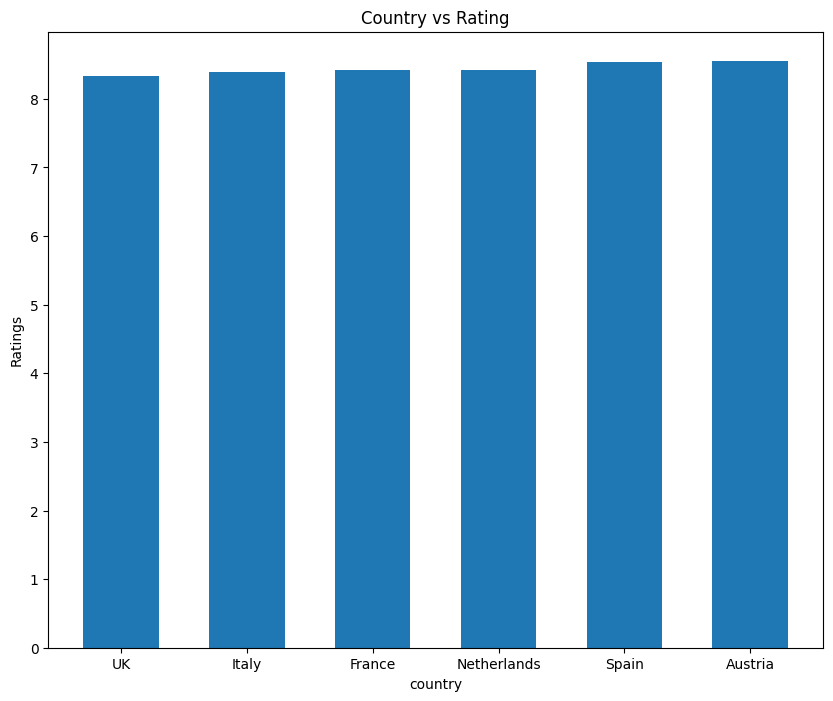

In [44]:
plt.figure(figsize=(10,8))
plt.bar(height=data1.groupby("country")["final_rating"].mean().sort_values(),x=a.index,width=0.6,align="center")
plt.xlabel("country")
plt.ylabel("Ratings")
plt.title("Country vs Rating")

### Report
- Austria has the highest Rating country for tourisum based on Hotel_accomodations.
- Average rating for all the coutries hotel hospitality are similar and good starting from **8.**.

In [45]:
for k,v in data1.groupby("hotel_name")["tags"]:
    print(k,v)

11 Cadogan Gardens 33703    [' Leisure trip ', ' Couple ', ' Superior Quee...
33704    [' Leisure trip ', ' Couple ', ' Superior Quee...
33705    [' Leisure trip ', ' Solo traveler ', ' Single...
33706    [' Leisure trip ', ' Couple ', ' Superior Quee...
33707    [' Leisure trip ', ' Couple ', ' Superior Quee...
                               ...                        
33857    [' Leisure trip ', ' Couple ', ' Superior Quee...
33858    [' Leisure trip ', ' Group ', ' Deluxe King Ro...
33859    [' Business trip ', ' Solo traveler ', ' 2 roo...
33860    [' Leisure trip ', ' Couple ', ' Superior Quee...
33861    [' Leisure trip ', ' Couple ', ' Superior Quee...
Name: tags, Length: 159, dtype: object
1K Hotel 43148    [' Leisure trip ', ' Couple ', ' Superior M Do...
43149    [' Leisure trip ', ' Solo traveler ', ' Superi...
43150    [' Leisure trip ', ' Couple ', ' Superior M Do...
43151    [' Leisure trip ', ' Group ', ' Superior M Dou...
43152    [' Leisure trip ', ' Solo traveler ', '

In [46]:
data1.tags.loc[1].split(",")

["[' Leisure trip '",
 " ' Couple '",
 " ' Duplex Double Room '",
 " ' Stayed 4 nights ']"]

In [47]:
a=[]
for i in data1.tags.loc[0].split(","):
    print(i[2:-2].strip())
    a.append(i[2:-2].strip())
" ".join(a)

Leisure trip
Couple
Duplex Double Room
Stayed 6 nights


'Leisure trip Couple Duplex Double Room Stayed 6 nights'

In [48]:
data1.tags.loc[0]

"[' Leisure trip ', ' Couple ', ' Duplex Double Room ', ' Stayed 6 nights ']"

In [49]:
tags_combine=[]
for i in range(data.shape[0]):
    tag_bag=[]
    for j in data1.tags.loc[i].split(","):
        tag_bag.append(j[2:-2].strip())
    tags_combine.append(" ".join(tag_bag))

tags_combine

['Leisure trip Couple Duplex Double Room Stayed 6 nights',
 'Leisure trip Couple Duplex Double Room Stayed 4 nights',
 'Leisure trip Family with young children Duplex Double Room Stayed 3 nights Submitted from a mobile device',
 'Leisure trip Solo traveler Duplex Double Room Stayed 3 nights',
 'Leisure trip Couple Suite Stayed 2 nights Submitted from a mobile device',
 'Leisure trip Group Duplex Double Room Stayed 1 night',
 'Leisure trip Group Duplex Twin Room Stayed 5 nights Submitted from a mobile device',
 'Leisure trip Couple Duplex Double Room Stayed 2 nights Submitted from a mobile device',
 'Leisure trip Couple Duplex Double Room Stayed 1 night Submitted from a mobile device',
 'Leisure trip Couple Large King Room Stayed 7 nights',
 'Leisure trip Group Duplex Double Room Stayed 2 nights Submitted from a mobile device',
 'Business trip Solo traveler Duplex Twin Room Stayed 1 night Submitted from a mobile device',
 'Leisure trip Solo traveler Duplex Double Room Stayed 2 nights Su

In [50]:
data1["tags_combined"]=tags_combine
data1.drop("tags",axis=1,inplace=True)
data1.head(),data1.shape

(                                       hotel_address   hotel_name  \
 0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
 1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
 2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
 3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
 4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
 
        country  final_rating  negative_reviews_no  positive_reviews_no  \
 0  Netherlands          5.30                  314                  382   
 1  Netherlands          7.60                  314                  382   
 2  Netherlands          7.40                  314                  382   
 3  Netherlands          5.75                  314                  382   
 4  Netherlands          7.20                  314                  382   
 
                                        tags_combined  
 0  Leisure trip Couple Duplex Double Room Stayed ...  
 1  Leisure tr

In [51]:
data1.head()

hotel_address   hotel_name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

       country  final_rating  negative_reviews_no  positive_reviews_no  \
0  Netherlands          5.30                  314                  382   
1  Netherlands          7.60                  314                  382   
2  Netherlands          7.40                  314                  382   
3  Netherlands          5.75                  314                  382   
4  Netherlands          7.20                  314                  382   

                                       tags_combined  
0  Leisure trip Couple Duplex Double Room Stayed ...  
1  Leisure trip Couple Duplex Double Room Stayed ...  
2  Leisure trip Family with young children Duplex...  
3  Leisure trip Solo traveler Duplex Double Room ...  
4  Leisure trip Couple Suite Stayed 2 nights Subm...

In [52]:
data1.describe()

final_rating  negative_reviews_no  positive_reviews_no
count  515738.000000        515738.000000        515738.000000
mean        8.396282           703.411286           839.213533
std         0.953550           729.572866           804.890477
min         3.850000             5.000000             8.000000
25%         7.850000           227.000000           289.000000
50%         8.650000           488.000000           598.000000
75%         9.150000           885.000000          1072.000000
max         9.900000          4262.000000          4099.000000

In [53]:
#Here we wil combine the review_no to form a single variable where review_no=positive_reviews_no-negetive_reviews_no
data1["review_no"]=data1.positive_reviews_no-data1.negative_reviews_no
data1.drop(["positive_reviews_no","negative_reviews_no"],axis=1,inplace=True)
data1.head()

hotel_address   hotel_name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

       country  final_rating  \
0  Netherlands          5.30   
1  Netherlands          7.60   
2  Netherlands          7.40   
3  Netherlands          5.75   
4  Netherlands          7.20   

                                       tags_combined  review_no  
0  Leisure trip Couple Duplex Double Room Stayed ...         68  
1  Leisure trip Couple Duplex Double Room Stayed ...         68  
2  Leisure trip Family with young children Duplex...         68  
3  Leisure trip Solo traveler Duplex Double Room ...         68  
4  Leisure trip Couple Suite Stayed 2 nights Subm...         68

In [54]:
count=0
for i in data1.review_no:
    if i<0:
        count+=1
print(count)

11428


In [55]:
data1.groupby(["country","hotel_name"])["review_no"].mean().sort_values(ascending=False).head(10)

country      hotel_name                                       
UK           Park Plaza Westminster Bridge London                 667.0
             DoubleTree by Hilton Hotel London Tower of London    599.0
             Intercontinental London The O2                       589.0
Netherlands  Hotel Esther a                                       565.0
UK           M by Montcalm Shoreditch London Tech City            517.0
             Strand Palace Hotel                                  473.0
             Park Grand London Kensington                         434.0
             Hilton London Canary Wharf                           426.0
             St James Court A Taj Hotel London                    417.0
Italy        Hotel Berna                                          413.0
Name: review_no, dtype: float64

In [56]:
data1.groupby(["country"])["review_no"].mean().sort_values(ascending=False)

country
UK             171.530272
Netherlands    164.677631
Italy           98.360040
Spain           97.170011
Austria         81.281209
France          49.302179
Name: review_no, dtype: float64

### Report
- Average of Hotels in United Kingdom have the most positive reviews showcasing their excellence in  hospitality and service  which is enjoyed by their customers.
- Average of Hotels in France has the has the least positive reviews showing their hospitality is good.
- Average rating of hotels in all the countries are positive which diplays their excellence in hospitality and services.
- When we compare the reviews with respect to their data present Netherlands has the most positive reviews highlighting their priority of customer satisfaction.

In [57]:
data1.groupby("country")["hotel_name"].unique()

country
Austria        [Hotel Bellevue Wien, Hotel Am Konzerthaus Vie...
France         [Monhotel Lounge SPA, Kube Hotel Ice Bar, Sple...
Italy          [Hotel VIU Milan, Maison Borella, Worldhotel C...
Netherlands    [Hotel Arena, Morgan Mees, Sir Albert Hotel, C...
Spain          [Sansi Diputacio, The One Barcelona GL, Catalo...
UK             [K K Hotel George, Apex Temple Court Hotel, Th...
Name: hotel_name, dtype: object

In [58]:
country=[]
hotels=[]
for i in range(data1.country.unique().shape[0]):
    print(f"Country = {data1.groupby("country")["hotel_name"].unique().index[i]} : Unique_hotels = {data1.groupby("country")["hotel_name"].unique()[i].shape[0]}")
    country.append(data1.groupby("country")["hotel_name"].unique().index[i])
    hotels.append(data1.groupby("country")["hotel_name"].unique()[i].shape[0])

Country = Austria : Unique_hotels = 158
Country = France : Unique_hotels = 458
Country = Italy : Unique_hotels = 162
Country = Netherlands : Unique_hotels = 105
Country = Spain : Unique_hotels = 211
Country = UK : Unique_hotels = 400


In [59]:
country,hotels

(['Austria', 'France', 'Italy', 'Netherlands', 'Spain', 'UK'],
 [158, 458, 162, 105, 211, 400])

Text(0.5, 0, 'Country')

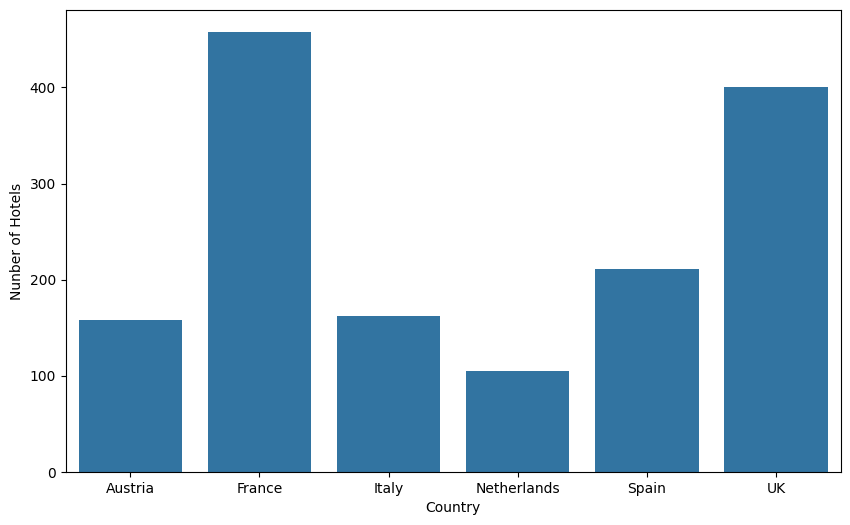

In [60]:
plt.figure(figsize=(10,6))
sns.barplot(x=country,y=hotels)
plt.ylabel("Nunber of Hotels")
plt.xlabel("Country")

### Report
- The data consists of maximum number of hotels from france.
- Netherlands have the least number of hotels in the data.

In [61]:
data1.head()

hotel_address   hotel_name  \
0   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
1   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
2   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
3   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   
4   s Gravesandestraat 55 Oost 1092 AA Amsterdam ...  Hotel Arena   

       country  final_rating  \
0  Netherlands          5.30   
1  Netherlands          7.60   
2  Netherlands          7.40   
3  Netherlands          5.75   
4  Netherlands          7.20   

                                       tags_combined  review_no  
0  Leisure trip Couple Duplex Double Room Stayed ...         68  
1  Leisure trip Couple Duplex Double Room Stayed ...         68  
2  Leisure trip Family with young children Duplex...         68  
3  Leisure trip Solo traveler Duplex Double Room ...         68  
4  Leisure trip Couple Suite Stayed 2 nights Subm...         68

In [62]:
data1.isna().sum()

hotel_address    0
hotel_name       0
country          0
final_rating     0
tags_combined    0
review_no        0
dtype: int64

In [ ]:
data1.to_excel("./dataset/final_data.xlsx")